In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("satcat.tsv", sep="\t", low_memory=False); data

,#JCAT,Satcat,Launch_Tag,Piece,Type,Name,PLName,LDate,Parent,SDate,...,ODate,Perigee,PF,Apogee,AF,Inc,IF,OpOrbit,OQUAL,AltNames
0,S00001,00001,1957 ALP,1957 ALP 1,R2,8K71PS No. M1-10 Stage 2,8K71A M1-10 (M1-1PS),1957 Oct 4,-,1957 Oct 4 1933,...,1957 Oct 4,214,,938,,65.10,,LLEO/I,-,-
1,S00002,00002,1957 ALP,1957 ALP 2,P,1-y ISZ,PS-1,1957 Oct 4,S00001,1957 Oct 4 1933,...,1957 Oct 4,214,,938,,65.10,,LLEO/I,-,":RE,:RC"
2,S00003,00003,1957 BET,1957 BET 1,P A,2-y ISZ,PS-2,1957 Nov 3,A00002,1957 Nov 3 0235,...,1957 Nov 3,211,,1659,,65.33,,LEO/I,-,":RE,:RC"
3,S00004,00004,1958 ALP,1958 ALP,P A,Explorer I,Explorer 1,1958 Feb 1,A00004,1958 Feb 1 0355,...,1958 Feb 1,359,,2542,,33.18,,LEO/I,-,":UA,:UB,DEAL I:IA"
4,S00005,00005,1958 BET,1958 BET 2,P,Vanguard I,Vanguard Test Satellite H,1958 Mar 17,S00016,1958 Mar 17 1224,...,1959 May 23,657,,3935,,34.25,,MEO,-,":UA,:VA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63020,S63021,63021,2025-032,2025-032S,P D,Starlink 32929,Starlink Group 12-8-17,2025 Feb 15,A11417,2025 Feb 15 0719:37,...,2025 Feb 15,285,,291,,43.01,,LLEO/I,-,-
63021,S63022,63022,2025-032,2025-032T,P D,Starlink 32944,Starlink Group 12-8-18,2025 Feb 15,A11417,2025 Feb 15 0719:37,...,2025 Feb 15,285,,291,,43.01,,LLEO/I,-,-
63022,S63023,63023,2025-032,2025-032U,P D,Starlink 32943,Starlink Group 12-8-19,2025 Feb 15,A11417,2025 Feb 15 0719:37,...,2025 Feb 15,285,,291,,43.01,,LLEO/I,-,-
63023,S63024,63024,2025-032,2025-032V,P D,Starlink 32803,Starlink Group 12-8-20,2025 Feb 15,A11417,2025 Feb 15 0719:37,...,2025 Feb 15,285,,291,,43.01,,LLEO/I,-,-


In [3]:
# data[data['Type'].str.split().str[0] == 'D' ]

def identify_debris(data):
    # Byte positions are 0-indexed in Python
    debris_conditions = (
        (data['Type'].str[0].isin(['D'])) |  # First byte indicates debris
        ((data['Type'].str[0].isin(['C'])) & data['Type'].str[1:].apply(lambda x: any(sub in x for sub in ["B", "I", "J", "K", "P", "Q", "W", "Z", "F", "M", "T", "V", "G", "O", "X"])))  # Component debris
    ) & ~data['Status'].isin(["R"])  # Status indicating debris
    
    return data[debris_conditions]

# Example usage:
# df = pd.read_csv("your_data.csv")
debris_df = identify_debris(data)

data_t = debris_df.copy()

data_t['Perigee'] = pd.to_numeric(data_t['Perigee'], errors='coerce')
data_t['Apogee'] = pd.to_numeric(data_t['Apogee'], errors='coerce')

data_t.loc[data_t['Perigee'] < 0, 'Perigee'] = np.nan
data_t.loc[data_t['Apogee'] < 0, 'Apogee'] = np.nan

# Drop rows where Perigee or Apogee is NaN (optional)
data_t = data_t.dropna(subset=['Perigee', 'Apogee'])

data_t

,#JCAT,Satcat,Launch_Tag,Piece,Type,Name,PLName,LDate,Parent,SDate,...,ODate,Perigee,PF,Apogee,AF,Inc,IF,OpOrbit,OQUAL,AltNames
50,S00051,00051,1960 IOT,1960 IOT 3,C V,A-11 Canister half,A-11,1960 Aug 12,S00050,1960 Aug 12 1001?,...,1960 Sep 18,1514.0,,1689.0,,47.20,,LEO/I,-,-
51,S00052,00052,1960 IOT,1960 IOT 4,D J,Mylar piece?,-,1960 Aug 12,S00051,1960 Aug 12 1002?,...,1976 Feb 28,1490.0,,1714.0,,47.15,,LEO/I,-,-
52,S00053,00053,1960 IOT,1960 IOT 5,C V,A-11 Canister half,A-11,1960 Aug 12,S00050,1960 Aug 12 1001?,...,1960 Sep 18,1512.0,,1705.0,,47.20,,LEO/I,-,-
84,S00085,00085,1961 DEL,1961 DEL 3,C V,S-56A Canister part?,-,1961 Feb 16,S00082,1961 Feb 16 1316,...,1969 Jul 21,639.0,,2458.0,,38.87,,LEO/I,-,-
118,S00119,00119,1961 OMI,1961 OMI 4,D P,deb Ablestar 008,-,1961 Jun 29,S00118,1961 Jun 29 0608,...,1961 Sep 11,785.0,,1008.0,,66.82,,LEO/I,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62942,S62943,62943,1997-012,1997-012P,D B -,deb DMSP F-14,-,1997 Apr 4,S24753,2024 Dec 19 0210,...,2025 Feb 10,794.0,,905.0,,98.61,,LEO/S,-,-
62943,S62944,62944,1997-012,1997-012Q,D B -,deb DMSP F-14,-,1997 Apr 4,S24753,2024 Dec 19 0210,...,2025 Feb 11,681.0,,837.0,,98.11,,LEO/S,-,-
62944,S62945,62945,1997-012,1997-012R,D B -,deb DMSP F-14,-,1997 Apr 4,S24753,2024 Dec 19 0210,...,2025 Feb 10,517.0,,830.0,,98.41,,LEO/S,-,-
62945,S62946,62946,1997-012,1997-012S,D B -,deb DMSP F-14,-,1997 Apr 4,S24753,2024 Dec 19 0210,...,2025 Feb 10,809.0,,837.0,,98.52,,LEO/S,-,-


In [4]:
status_counts = debris_df["Status"].value_counts()
# status_counts = status_counts.drop(["R","O","O?","OX"], errors="ignore")  # Remove "R" if it exists



total = status_counts.sum()
percentages = (status_counts / total) * 100
print(percentages.to_string(float_format="%.2f") + " %")
# Create a pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
# plt.show()
status_counts



Status
O     91.99
OX     7.48
DSO    0.13
TFR    0.13
ATT    0.09
C      0.05
R?     0.05
DSA    0.03
AR     0.01
N      0.01
ERR    0.01
AO     0.01
E      0.01 %


Status
O      12001
OX       976
DSO       17
TFR       17
ATT       12
C          7
R?         7
DSA        4
AR         1
N          1
ERR        1
AO         1
E          1
Name: count, dtype: int64

In [44]:
# List of space debris (waste)
# Selecting specific columns and making a copy to avoid SettingWithCopyWarning
data_t = data[['#JCAT', 'Satcat', 'Name', 'SDate','LDate','DDate', 'Status', 'Owner', 
               'State', 'Manufacturer', 'Mass', 'Shape', 'Perigee', 'Apogee', 'OpOrbit']].copy()

space_debris = ["C", "DK", "DSA", "DSO", "E", "ERR", "L?", "OX", "R?"]

# List of not space debris (active or uncertain status)
space_active = ["O", "N"]


data_t['Perigee'] = pd.to_numeric(data_t['Perigee'], errors='coerce')
data_t['Apogee'] = pd.to_numeric(data_t['Apogee'], errors='coerce')

data_t.loc[data_t['Perigee'] < 0, 'Perigee'] = np.nan
data_t.loc[data_t['Apogee'] < 0, 'Apogee'] = np.nan

# Drop rows where Perigee or Apogee is NaN (optional)
data_t = data_t.dropna(subset=['Perigee', 'Apogee'])

# Calculate the average orbit altitude, ignoring NaN values
data_t['average'] = (data_t['Perigee'] + data_t['Apogee']) / 2000   
# Filter for space debris (waste)
data_waste = data_t[data_t['Status'].isin(space_debris)]

# Filter for active/uncertain status satellites
data_active = data_t[data_t['Status'].isin(space_active)]


data_active
data_waste

status_counts = data_active["Status"].value_counts()
status_counts


Series([], Name: count, dtype: int64)

In [46]:
import numpy as np
import matplotlib.pyplot as plt

E_radius = 6.800
# Define radius (r) as the satellite's average altitude + Earth’s radius
r1 = data_waste['average'] + E_radius
r2 = data_active['average'] + E_radius
theta1 = np.random.uniform(0, 2 * np.pi, size=len(r1))
theta2 = np.random.uniform(0, 2 * np.pi, size=len(r2))

# Generate random angles for scattering the points
theta = np.random.uniform(0, 2 * np.pi, size=len(r1))

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.set_rlim(0, 405)
ax.set_yscale('log')
ax.spines['polar'].set_visible(False)

ax.scatter(theta2, r2, s=2, alpha=0.6, color='blue', label ="Active Satellite")
ax.scatter(theta1, r1, s=2, alpha=0.6, color='red', label ="Debris")

ax.grid(axis='x', visible=False) 
# ax.grid(axis='y', visible=False) 

plt.title('Active Satellites vs Space Debris', fontsize=14)
ax.set_xticks([])
ax.set_yticks([6.378])

yticklabels = ax.set_yticklabels(["Earth's Surface"])

# Set a background color for the label
for label in yticklabels:
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
ax.yaxis.get_gridlines()[0].set_color('#FFDE00')
ax.yaxis.get_gridlines()[0].set_linewidth(2) 
# ax.set_yticklabels(["Earth's Surface"])
ax.legend(loc='upper right')

#plt.savefig('1.png', bbox_inches='tight', dpi=300)
plt.show()



ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 800x800 with 1 Axes>

C:\Users\gmahm\AppData\Local\Temp\ipykernel_16440\862545221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner', y='count', data=owner_wastes, palette='viridis')


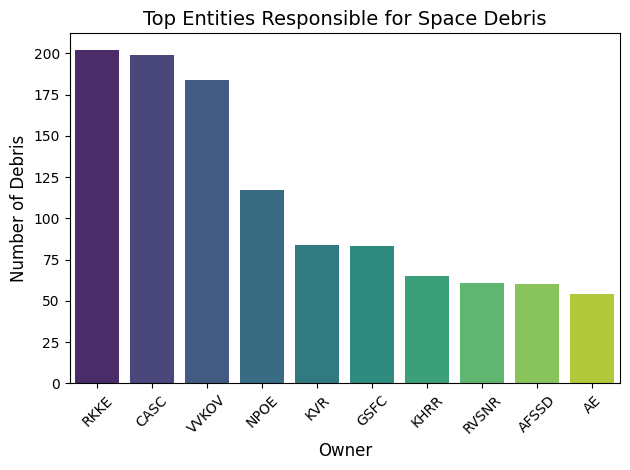

In [7]:
owner_wastes = data_waste['Owner'].value_counts().reset_index().head(10); owner_wastes
sns.barplot(x='Owner', y='count', data=owner_wastes, palette='viridis')

# Customize the plot
plt.title('Top Entities Responsible for Space Debris', fontsize=14)
plt.xlabel('Owner', fontsize=12)
plt.ylabel('Number of Debris', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

#plt.savefig('2.png', bbox_inches='tight', dpi=300)


C:\Users\gmahm\AppData\Local\Temp\ipykernel_16440\2731668419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='count', data=owner_wastes, palette='viridis')


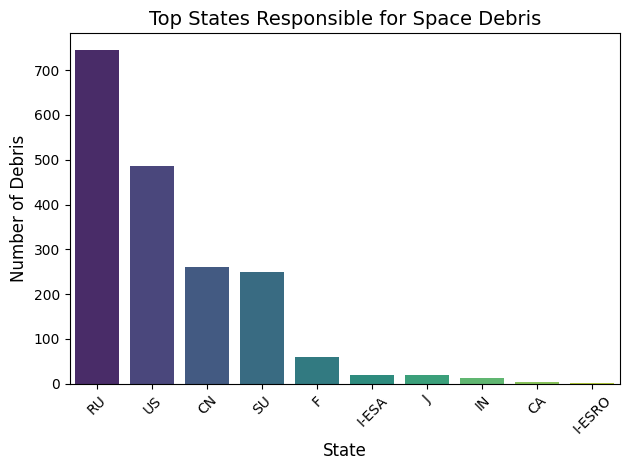

In [8]:
owner_wastes = data_waste['State'].value_counts().reset_index().head(10); owner_wastes
sns.barplot(x='State', y='count', data=owner_wastes, palette='viridis')

# Customize the plot
plt.title('Top States Responsible for Space Debris', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Debris', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

#plt.savefig('3.png', bbox_inches='tight', dpi=300)


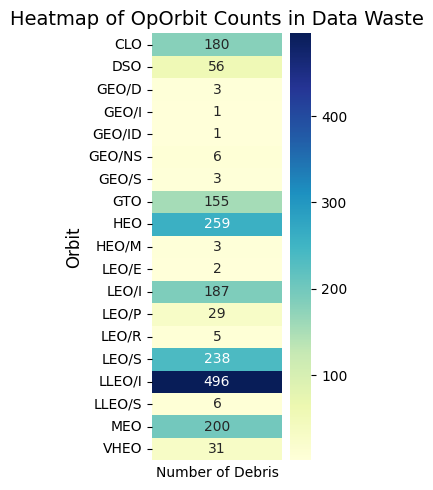

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data_waste' contains space debris data
density_wastes = data_waste['OpOrbit'].value_counts().reset_index()
density_wastes = density_wastes[density_wastes['OpOrbit'] != '-']

# Pivot table for heatmap
heatmap_data = density_wastes.pivot_table(index='OpOrbit', values='count', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(3, 5))
ax = sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# Customize the plot
plt.title('Heatmap of OpOrbit Counts in Data Waste', fontsize=14)
plt.ylabel('Orbit', fontsize=12)

# Hide x-axis label and ticks to remove "count"
ax.set_xlabel("Number of Debris")  # Removes the x-axis label
ax.set_xticks([])  # Removes x-axis ticks

plt.tight_layout()

# Save the figure
plt.savefig('sat_heatMap.png', bbox_inches='tight', dpi=300)

plt.show()


C:\Users\gmahm\AppData\Local\Temp\ipykernel_16440\949147982.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = density_wastes.pivot_table(index='OpOrbit', values='count', aggfunc='sum', fill_value=0)


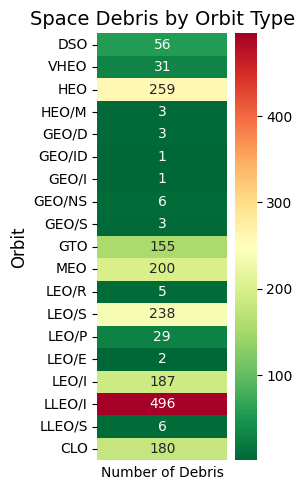

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data_waste' contains space debris data
density_wastes = data_waste['OpOrbit'].value_counts().reset_index()
density_wastes = density_wastes[density_wastes['OpOrbit'] != '-']

# Define the correct altitude order from highest to lowest
orbit_order = [
    "DSO", "VHEO", "HEO", "HEO/M", "GEO/D", "GEO/ID", "GEO/I", "GEO/NS", "GEO/S", "GTO", 
    "MEO", "LEO/R", "LEO/S", "LEO/P", "LEO/E", "LEO/I", "LLEO/I", "LLEO/S", "CLO"
]

# Ensure OpOrbit is a categorical variable with the defined order
density_wastes['OpOrbit'] = pd.Categorical(density_wastes['OpOrbit'], categories=orbit_order, ordered=True)

# Sort data based on the custom order
density_wastes = density_wastes.sort_values('OpOrbit')

# Pivot table for heatmap
heatmap_data = density_wastes.pivot_table(index='OpOrbit', values='count', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(3, 5))  # Adjust height to fit all orbits
ax = sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn_r', fmt='d', cbar=True)

# Customize the plot
plt.title('Space Debris by Orbit Type', fontsize=14)
plt.ylabel('Orbit', fontsize=12)
ax.set_xlabel("Number of Debris")  # Set x-axis label
ax.set_xticks([]) 
plt.tight_layout()

# Save the figure
plt.savefig('4.png', bbox_inches='tight', dpi=300)

plt.show()


In [11]:
data_waste

,#JCAT,Satcat,Name,SDate,LDate,DDate,Status,Owner,State,Manufacturer,Mass,Shape,Perigee,Apogee,OpOrbit,average
51,S00052,00052,Mylar piece?,1960 Aug 12 1002?,1960 Aug 12,-,OX,LARCN,US,-,0,-,1490.0,1714.0,LEO/I,1602.0
97,S00098,00098,Explorer 10,1961 Mar 25 1525,1961 Mar 25,1961 Mar 26 0724,DSO,GSFC,US,GSFC,35,Cyl + Ant + 2 Ant,221.0,181000.0,DSO,90610.5
221,S00222,00222,Agena B 6003,1962 Jan 26 2037,1962 Jan 26,1962 Jan 28,DSO,MSFC,US,LMSC,2240,Cyl,200.0,507.0,LLEO/I,353.5
431,S00432,00432,Explorer 14,1962 Oct 2 2225?,1962 Oct 2,1965?,R?,GSFC,US,RAYM,40,Oct Cyl + Ant + 4 Pan,915.0,96959.0,VHEO,48937.0
438,S00439,00439,Ranger 5,1962 Oct 18 1737,1962 Oct 18,1962 Oct 19 0757,DSO,JPL,US,JPL,203,Hex Cyl + Truss + 2 Pan,207.0,543753.0,CLO,271980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62459,S62460,62460,SPADEX-B,2024 Dec 30 1645:24,2024 Dec 30,2025 Jan 16 0049,DK,ISRO,IN,ISRO,220,Box+ 2 pan,469.0,476.0,LLEO/I,472.5
62715,S62716,62716,Blue Ghost,2025 Jan 15 0716:44,2025 Jan 15,2025 Jan 15 2248?,DSO,FFLY,US,FFLY,1500,Box+4 legs,189.0,322453.0,CLO,161321.0
62716,S62717,62717,Resilience,2025 Jan 15 0743:49,2025 Jan 15,2025 Jan 15 2226?,DSO,ISPACE,J,ISPACE/ADSL,1050,Box+4 legs,176.0,362529.0,CLO,181352.5
62717,S62718,62718,MPC Upper Section,2025 Jan 15 0722:03,2025 Jan 15,2025 Jan 15 2248?,DSO,SPX,US,SPX,50,Cyl?,189.0,322453.0,CLO,161321.0


In [12]:
owner_waste = data_waste[['Satcat',	'SDate', 'Owner']]; owner_waste

,Satcat,SDate,Owner
51,00052,1960 Aug 12 1002?,LARCN
97,00098,1961 Mar 25 1525,GSFC
221,00222,1962 Jan 26 2037,MSFC
431,00432,1962 Oct 2 2225?,GSFC
438,00439,1962 Oct 18 1737,JPL
...,...,...,...
62459,62460,2024 Dec 30 1645:24,ISRO
62715,62716,2025 Jan 15 0716:44,FFLY
62716,62717,2025 Jan 15 0743:49,ISPACE
62717,62718,2025 Jan 15 0722:03,SPX


In [13]:
# data_waste_trimmed = data_waste[data_waste['DDate']!='-'].copy()
data_waste_trimmed = data_waste[data_waste['DDate']].copy()
data_waste_trimmed["DYear"] = data_waste_trimmed["DDate"].str.extract(r'(\d{4})')

# data_active_trimmed = data_active[data_active['LDate']!='-'].copy()
data_active_trimmed = data_active[data_active['LDate']].copy()
data_active_trimmed["LYear"] = data_active_trimmed["LDate"].str.extract(r'(\d{4})')

data_waste_trimmed
data_active_trimmed


KeyError: "None of [Index(['-', '1961 Mar 26 0724', '1962 Jan 28', '1965?', '1962 Oct 19 0757',\n       '1962 Oct 19 0757', '1963 Apr  3 0005?', '1980?', '1980?',\n       '1963 Nov 27 2112?',\n       ...\n       '2024 Sep 29 2130', '2024 Oct 30 0300', '2024 Nov  5 1452:11',\n       '2024 Nov 15 1832', '2024 Nov 23 1431:17', '2025 Jan 16 0049',\n       '2025 Jan 15 2248?', '2025 Jan 15 2226?', '2025 Jan 15 2248?',\n       '2025 Jan 15 2226?'],\n      dtype='object', length=1863)] are in the [columns]"

In [22]:
status_counts = (
    data_waste_trimmed.groupby("DYear")["Status"]
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)



status_cumulative = status_counts.set_index("DYear").cumsum().reset_index()


# Step 3: Sort columns by the accumulated value in 2025
sorted_columns = ["DYear"] + status_cumulative.iloc[-1, 1:].sort_values().index.tolist()
status_cumulative = status_cumulative[sorted_columns]
status_cumulative


NameError: name 'data_waste_trimmed' is not defined

In [ ]:
# Group by DYear and count all status occurrences for waste
status_waste = (
    data_waste_trimmed.groupby("DYear")["Status"]
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

# Sum all status columns to get the total count of waste statuses per year
status_waste["TotalWaste"] = status_waste.drop(columns=["DYear"]).sum(axis=1)

# Compute cumulative sum for total waste
status_waste_cumulative = status_waste[["DYear", "TotalWaste"]].set_index("DYear").cumsum().reset_index()

# Group by LYear and count all status occurrences for active satellites
status_active = (
    data_active_trimmed.groupby("LYear")["Status"]
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

# Sum all status columns to get the total count of active satellites per year
status_active["TotalActive"] = status_active.drop(columns=["LYear"]).sum(axis=1)

# Compute cumulative sum for active satellites
status_active_cumulative = status_active[["LYear", "TotalActive"]].set_index("LYear").cumsum().reset_index()


status_active_cumulative
final_df = pd.merge(
    status_active[["LYear", "TotalActive"]],  # Keep LYear and TotalActive
    status_waste[["DYear", "TotalWaste"]],   # Keep DYear and TotalWaste
    left_on="LYear", 
    right_on="DYear", 
    how="outer"  # Outer join to include all LYears and DYears
).fillna({"TotalWaste": 0, "TotalActive": 0})  # Set missing values to 0

# Now adjust the column names for clarity
final_df["Year"] = final_df["LYear"]  # Set the Year column from LYear
final_df.drop(columns=["LYear", "DYear"], inplace=True)  # Drop LYear and DYear columns

# Compute cumulative sum for both TotalActive and TotalWaste
final_df["CumulativeActive"] = final_df["TotalActive"].cumsum()
final_df["CumulativeWaste"] = final_df["TotalWaste"].cumsum()

# Display the final DataFrame with cumulative counts

final_df = final_df[["Year", "CumulativeActive", "CumulativeWaste"]]
final_df



In [ ]:
import matplotlib.pyplot as plt

# Plot the cumulative values for TotalActive and TotalWaste over the years
fig, ax = plt.subplots(figsize=(12, 6))

# Plot 'CumulativeActive' and 'CumulativeWaste'
ax.plot(final_df["Year"], final_df["CumulativeActive"], label="Cumulative Active", color="blue")
ax.plot(final_df["Year"], final_df["CumulativeWaste"], label="Cumulative Waste", color="red")

# Customize the plot
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Count")

# Adjust x-ticks for readability
years = final_df["Year"]
ax.set_xticks(years[::max(1, len(years) // 10)])  # Pick approximately 10 evenly spaced ticks

ax.set_title("Accumulation of Active Satellites and Space Waste Over Time")
ax.legend(title="Status", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(False)

# Save the plot as an image
plt.savefig('final_trend.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Extract sorted status columns (excluding 'DYear')
status_columns = sorted_columns[1:]

# Plot each status from largest to smallest accumulated value in 2025
for status in reversed(status_columns):  # Largest first, smallest last
    ax.plot(status_cumulative["DYear"], status_cumulative[status], label=status)

# Customize the plot
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Count")

years = status_cumulative["DYear"]
ax.set_xticks(years[::max(1, len(years) // 10)])  # Pick approximately 10 evenly spaced ticks

ax.set_title("Accumulation of Space Debris by Status Over Time")
ax.legend(title="Status", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(False)

plt.savefig('trend.png', bbox_inches='tight', dpi=300)